In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from decouple import config
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras import Sequential
from keras.layers import Input, Dense, Dropout



In [2]:
csv_path = config("CSV_PATH")

In [3]:
df = pd.read_csv(csv_path)

In [4]:
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


In [5]:
features = df.drop("Classes", axis= 1)
target = df["Classes"]

In [6]:
target_dummies = pd.get_dummies(target)

In [7]:
scaler = StandardScaler()

In [8]:
df_scaled = scaler.fit_transform(features)

### PCA

In [9]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [10]:
pca.n_components_

100

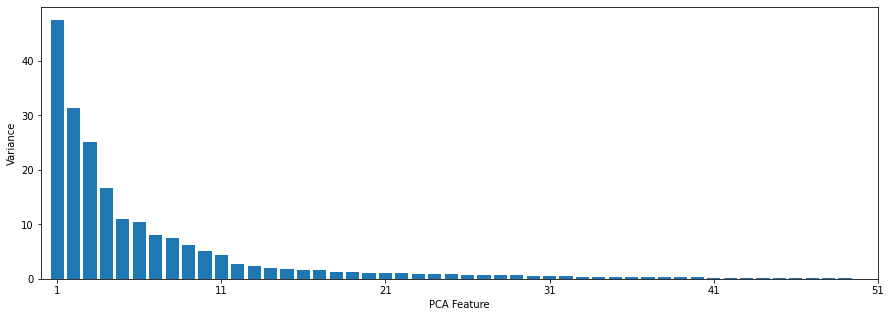

In [11]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(1, 101), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.xticks(range(1, 101, 10))
plt.xlim(0,51)
plt.show()

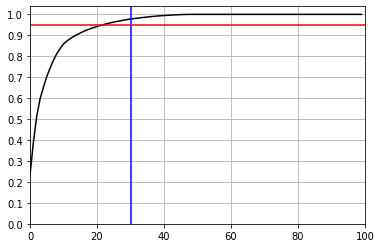

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='black')
plt.xlim(0,100)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(30, c='b')
plt.axhline(0.95, c='r')
plt.grid()
plt.show()

In [13]:
pca = PCA(n_components=22)
df_pca = pca.fit_transform(df_scaled)

### Model without PCA

In [14]:
x_train, x_test, y_train, y_test = train_test_split(df_scaled, target_dummies,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target_dummies)

In [15]:
n_features = x_train.shape[1]

In [16]:
n_features

200

In [17]:
model = Sequential()
model.add(Dense(n_features, activation="tanh", input_shape=(n_features,)))
model.add(Dense(128, activation="tanh"))
#model.add(Dense(64, activation="tanh"))
model.add(Dropout(0.50))
model.add(Dense(7, activation="softmax"))

2022-06-13 15:59:37.287061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               40200     
                                                                 
 dense_1 (Dense)             (None, 128)               25728     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 7)                 903       
                                                                 
Total params: 66,831
Trainable params: 66,831
Non-trainable params: 0
_________________________________________________________________


In [20]:
hist = model.fit(x_train, y_train, epochs=16, validation_data=(x_test, y_test))

Epoch 1/16
3/3 [==============================] - 1s 77ms/step - loss: 2.3346 - accuracy: 0.1143 - val_loss: 1.5533 - val_accuracy: 0.5000
Epoch 2/16
3/3 [==============================] - 0s 10ms/step - loss: 1.5628 - accuracy: 0.5000 - val_loss: 1.2472 - val_accuracy: 0.5667
Epoch 3/16
3/3 [==============================] - 0s 12ms/step - loss: 1.1619 - accuracy: 0.5429 - val_loss: 1.0755 - val_accuracy: 0.7000
Epoch 4/16
3/3 [==============================] - 0s 12ms/step - loss: 0.7443 - accuracy: 0.7286 - val_loss: 0.9710 - val_accuracy: 0.7667
Epoch 5/16
3/3 [==============================] - 0s 12ms/step - loss: 0.6766 - accuracy: 0.8286 - val_loss: 0.8919 - val_accuracy: 0.7667
Epoch 6/16
3/3 [==============================] - 0s 13ms/step - loss: 0.5714 - accuracy: 0.8571 - val_loss: 0.8291 - val_accuracy: 0.8000
Epoch 7/16
3/3 [==============================] - 0s 11ms/step - loss: 0.5330 - accuracy: 0.8857 - val_loss: 0.7648 - val_accuracy: 0.8000
Epoch 8/16
3/3 [===========

In [21]:
loss, acc = model.evaluate(x_train, y_train, verbose=0)
print("Train loss:", loss)
print("Train acc:", acc)

Train loss: 0.125383660197258
Train acc: 0.9857142567634583


In [22]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test acc:", acc)

Test loss: 0.405241459608078
Test acc: 0.8999999761581421


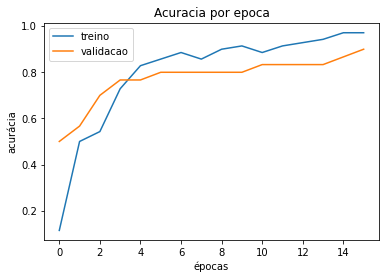

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])
plt.show()

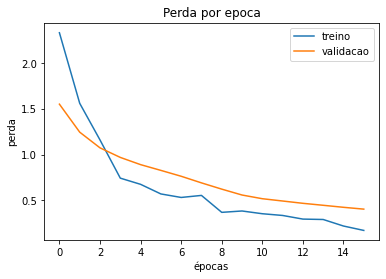

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Perda por epoca')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
plt.show()

In [25]:
#model.save("final_model_all_features.h5")

### Model with PCA

In [26]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, target_dummies,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=target_dummies)

In [27]:
n_features = x_train_pca.shape[1]

In [28]:
n_features

22

In [29]:
model = Sequential()
model.add(Dense(n_features, activation="tanh", input_shape=(n_features,)))
model.add(Dense(16, activation="tanh"))
model.add(Dropout(0.50))
model.add(Dense(7, activation="softmax"))

In [30]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 22)                506       
                                                                 
 dense_4 (Dense)             (None, 16)                368       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                 119       
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [32]:
hist_pca = model.fit(x_train_pca, y_train_pca, epochs=300, validation_data=(x_test_pca, y_test_pca))

Epoch 1/300
3/3 [==============================] - 0s 65ms/step - loss: 2.2771 - accuracy: 0.2000 - val_loss: 2.2324 - val_accuracy: 0.1000
Epoch 2/300
3/3 [==============================] - 0s 10ms/step - loss: 2.4493 - accuracy: 0.1571 - val_loss: 2.1962 - val_accuracy: 0.1000
Epoch 3/300
3/3 [==============================] - 0s 10ms/step - loss: 2.2969 - accuracy: 0.2143 - val_loss: 2.1616 - val_accuracy: 0.1000
Epoch 4/300
3/3 [==============================] - 0s 11ms/step - loss: 2.2341 - accuracy: 0.2000 - val_loss: 2.1276 - val_accuracy: 0.1000
Epoch 5/300
3/3 [==============================] - 0s 10ms/step - loss: 2.0830 - accuracy: 0.1857 - val_loss: 2.0942 - val_accuracy: 0.1000
Epoch 6/300
3/3 [==============================] - 0s 11ms/step - loss: 2.0910 - accuracy: 0.2429 - val_loss: 2.0616 - val_accuracy: 0.1000
Epoch 7/300
3/3 [==============================] - 0s 10ms/step - loss: 2.0351 - accuracy: 0.3286 - val_loss: 2.0293 - val_accuracy: 0.1000
Epoch 8/300
3/3 [===

In [33]:
loss_pca, acc_pca = model.evaluate(x_train_pca, y_train_pca, verbose=0)
print("Train loss:", loss_pca)
print("Train acc:", acc_pca)

Train loss: 0.10840322822332382
Train acc: 0.9857142567634583


In [34]:
loss_pca, acc_pca = model.evaluate(x_test_pca, y_test_pca, verbose=0)
print("Test loss:", loss_pca)
print("Test acc:", acc_pca)

Test loss: 0.21204927563667297
Test acc: 0.9666666388511658


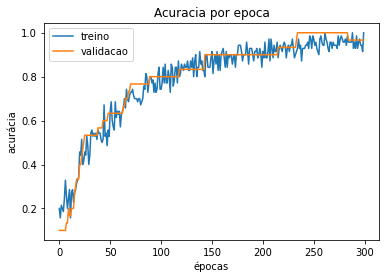

In [35]:
plt.plot(hist_pca.history['accuracy'])
plt.plot(hist_pca.history['val_accuracy'])
plt.title('Acuracia por epoca')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validacao'])
plt.show()

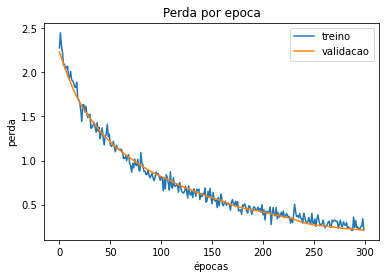

In [36]:
plt.plot(hist_pca.history['loss'])
plt.plot(hist_pca.history['val_loss'])
plt.title('Perda por epoca')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validacao'])
plt.show()

In [38]:
model.save("final_model_pca.h5")